In [17]:
# import hcp_utils as hcp
import sys
from scipy.io import loadmat
import numpy as np
import matplotlib
import glob
from matplotlib import pyplot as plt
import numpy as np
import nat_asd_utils
import numpy as np
import nibabel as nb
import pandas as pd
import pilot


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


# note ; this should be set up in the loop so it is not double dipping

In [4]:
def fdr_correction(p_values):
    # Sort the p-values in ascending order
    sorted_p_indices = np.argsort(p_values)
    sorted_p_values = np.sort(p_values)
    
    # Calculate the corrected p-values
    m = len(p_values)
    ranks = np.arange(1, m + 1)
    corrected_p_values = sorted_p_values * m / ranks
    
    # Ensure the corrected p-values are between 0 and 1
    corrected_p_values = np.minimum.accumulate(corrected_p_values[::-1])[::-1]
    
    # Return the corrected p-values in their original order
    unsorted_corrected_p_values = np.empty_like(corrected_p_values)
    unsorted_corrected_p_values[sorted_p_indices] = corrected_p_values
    
    return unsorted_corrected_p_values

In [5]:
#with open('thresholded_pilots_ru_dm_list.txt', 'r') as file:
with open('pilots_ru_dm_list.txt', 'r') as file:
    sub_list = file.readlines()
good_subjects_list = [line.strip() for line in sub_list]

In [6]:
percent_sig=[]
mean_r2=[]
for sub in good_subjects_list:
    loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv.npz')
    sub_data=loaded['stacked_r2s']
    mean_r2.append(np.mean(loaded['stacked_r2s']))
    bootstrap_files = glob.glob(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv_bootstrap-*.npz')
    bootstrap_data=[]
    for f in bootstrap_files:
        data=np.load(f)
        bootstrap_data.append(data['stacked_r2s'])
    bootstrap_data=np.asanyarray(bootstrap_data)
    
    p_vals=[]
    for i,sub_d in enumerate(sub_data):
        bool_arr=bootstrap_data[:,i]>sub_d
        count = np.sum(bool_arr)
        p_vals.append(count/bootstrap_data.shape[0])
    
    #bh_corrected=false_discovery_control(p_vals, method='bh')
    #sub_data[bh_corrected > 0.05] = 0
    bh_corrected = fdr_correction(p_vals)
    count_p=len([x for x in p_vals if x <= 0.05])
    count = len([x for x in bh_corrected if x <= 0.05])
    #print(len(bootstrap_files),count_p,count)
    percent_sig.append(count/len(p_vals))

In [7]:
mean_r2

[0.03790475020251245,
 0.10267705514635325,
 0.0070668299122307,
 0.11665525280527016,
 0.08079437560885401,
 -0.0017207859487904558,
 0.02458723065813182,
 0.07108583898477405,
 0.04304291031485368,
 0.05341047554159523,
 0.009352124143785164,
 0.0727821857401982,
 0.0693899694490322,
 0.03924361083033583,
 0.13219002272725125,
 0.0025466552634187405,
 0.08077943728278544,
 0.08677626393014694,
 0.06722774621238606,
 0.06692482489740828,
 0.03187806918054494,
 0.0257454317273379,
 0.06312141688217524,
 0.08120941512016656,
 0.15155115303924363,
 0.11204800977791042]

### plot r2 vs bootstrap percent of significant voxels

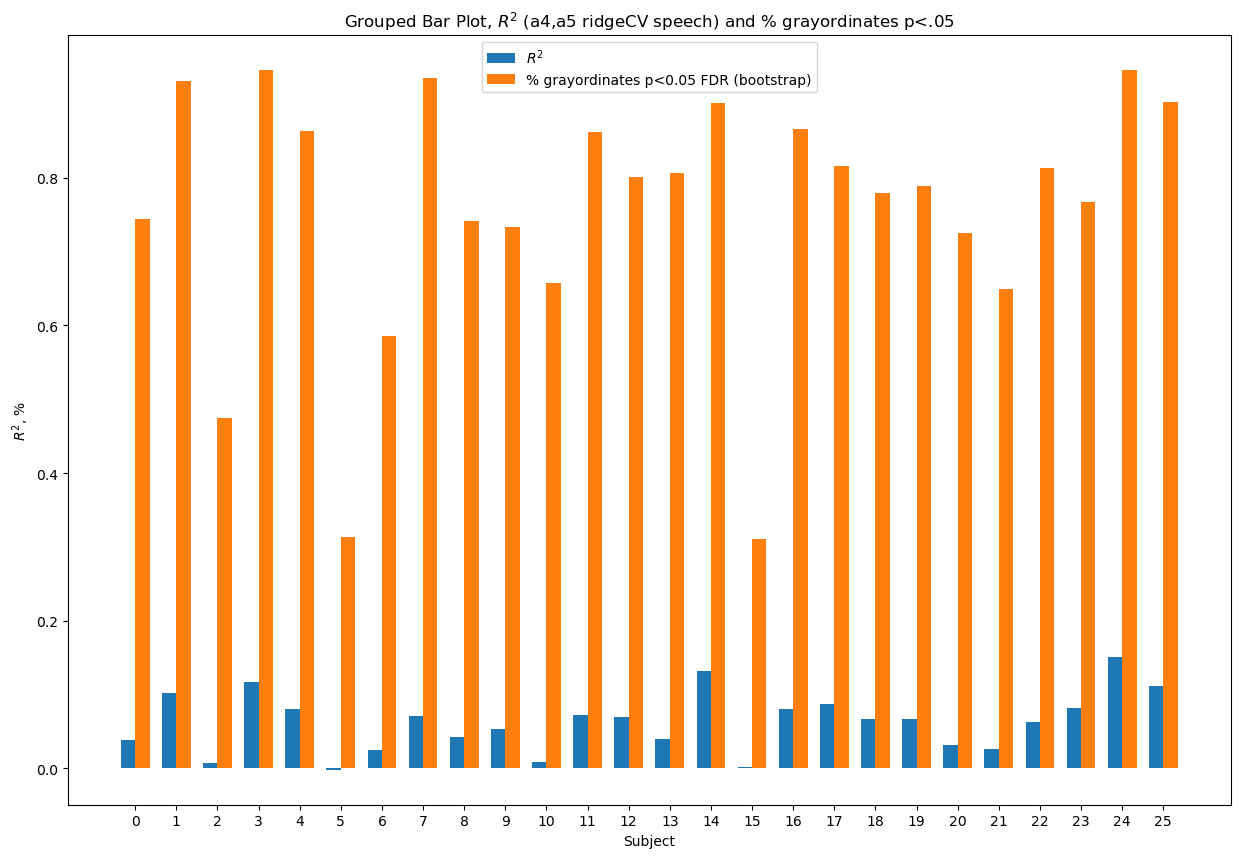

In [8]:
percent_sig

N = len(mean_r2)

# Position of bars on x-axis
ind = np.arange(N)

# Width of bars
width = 0.35

# Plotting the bars

fig, ax = plt.subplots(figsize=(15, 10))
bar1 = ax.bar(ind, mean_r2, width, label='$R^2$')
bar2 = ax.bar(ind + width, percent_sig, width, label='% grayordinates p<0.05 FDR (bootstrap)')

# Adding labels, title, and legend
ax.set_xlabel('Subject')
ax.set_ylabel('$R^2$, %')
ax.set_title('Grouped Bar Plot, $R^2$ (a4,a5 ridgeCV speech) and % grayordinates p<.05')
ax.set_xticks(ind + width / 2)
#ax.set_xticklabels([chr(i) for i in range(65, 65 + N)])  # Labels as A, B, C, ..., Z
ax.set_xticklabels([i for i in range(N)])  # Labels as A, B, C, ..., Z

ax.legend()

# Display the plot
plt.show()

## compare this to the stacked r2

In [10]:
#with open('thresholded_pilots_ru_dm_list.txt', 'r') as file:
with open('pilots_ru_dm_list.txt', 'r') as file:
    sub_list = file.readlines()
good_subjects_list = [line.strip() for line in sub_list]

In [12]:
percent_sig=[]
mean_r2=[]
for sub in good_subjects_list:
    loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-auditory_feat-cochresnet50srp05hrfssfirst_delay-0.npz')
    sub_data=loaded['stacked_r2s']
    mean_r2.append(np.mean(loaded['stacked_r2s']))
    bootstrap_files = glob.glob(f'../good_pilots_new/sub-{sub}_roi-auditory_feat-cochresnet50srp05hrfssfirst_delay-0_bootstrap-*.npz')
    bootstrap_data=[]
    for f in bootstrap_files:
        data=np.load(f)
        bootstrap_data.ccappend(data['stacked_r2s'])
    bootstrap_data=np.asanyarray(bootstrap_data)
    
    p_vals=[]
    for i,sub_d in enumerate(sub_data):
        bool_arr=bootstrap_data[:,i]>sub_d
        count = np.sum(bool_arr)
        p_vals.append(count/bootstrap_data.shape[0])
    
    #bh_corrected=false_discovery_control(p_vals, method='bh')
    #sub_data[bh_corrected > 0.05] = 0
    bh_corrected = fdr_correction(p_vals)
    count_p=len([x for x in p_vals if x <= 0.05])
    count = len([x for x in bh_corrected if x <= 0.05])
    #print(len(bootstrap_files),count_p,count)
    percent_sig.append(count/len(p_vals))

In [14]:
percent_sig

[0.48841463414634145,
 0.5701219512195121,
 0.3567073170731707,
 0.47012195121951217,
 0.6158536585365854,
 0.22317073170731708,
 0.23231707317073172,
 0.47621951219512193,
 0.2804878048780488,
 0.3384146341463415,
 0.11585365853658537,
 0.2896341463414634,
 0.31402439024390244,
 0.42317073170731706,
 0.6530487804878049,
 0.22195121951219512,
 0.47804878048780486,
 0.6152439024390244,
 0.474390243902439,
 0.5067073170731707,
 0.2841463414634146,
 0.4548780487804878,
 0.48902439024390243,
 0.551829268292683,
 0.7006097560975609,
 0.5481707317073171]

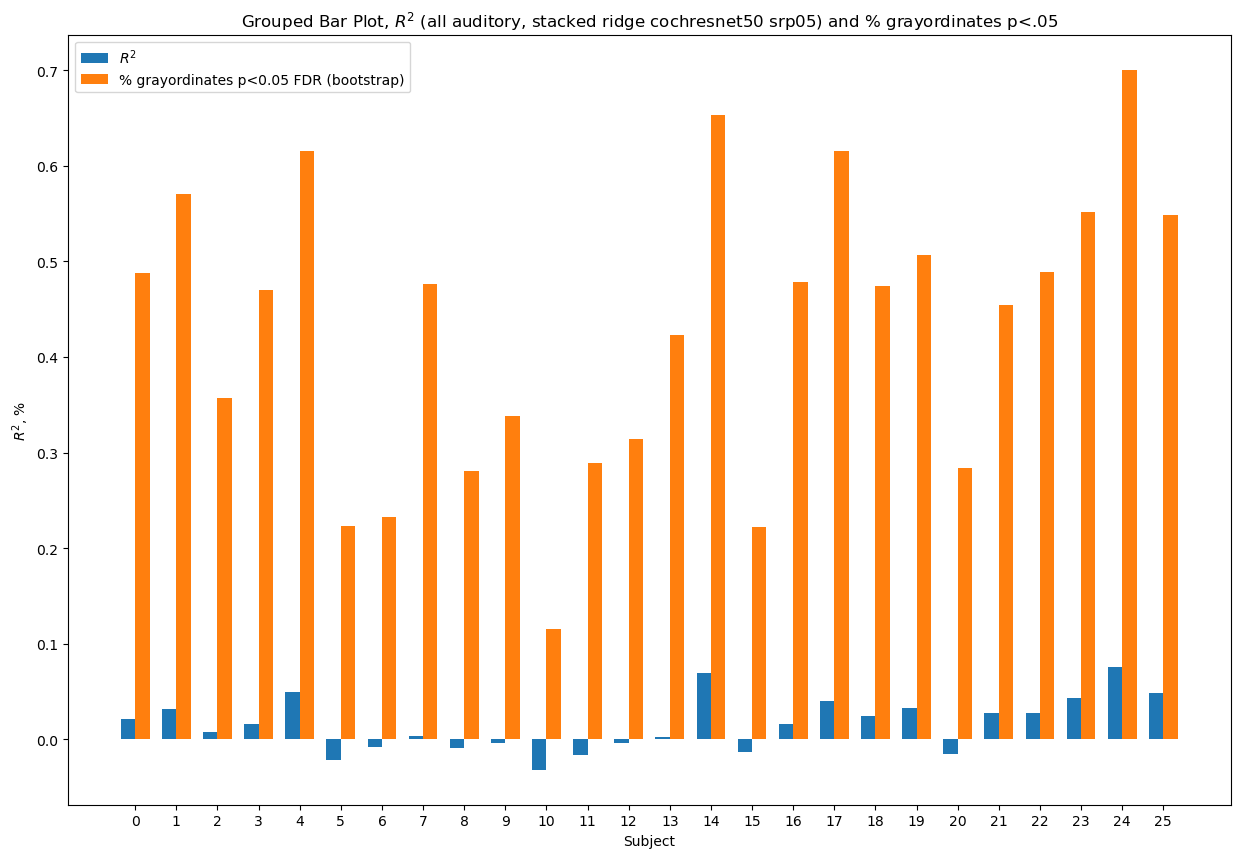

In [16]:
percent_sig

N = len(mean_r2)

# Position of bars on x-axis
ind = np.arange(N)

# Width of bars
width = 0.35

# Plotting the bars

fig, ax = plt.subplots(figsize=(15, 10))
bar1 = ax.bar(ind, mean_r2, width, label='$R^2$')
bar2 = ax.bar(ind + width, percent_sig, width, label='% grayordinates p<0.05 FDR (bootstrap)')

# Adding labels, title, and legend
ax.set_xlabel('Subject')
ax.set_ylabel('$R^2$, %')
ax.set_title('Grouped Bar Plot, $R^2$ (all auditory, stacked ridge cochresnet50 srp05) and % grayordinates p<.05')
ax.set_xticks(ind + width / 2)
#ax.set_xticklabels([chr(i) for i in range(65, 65 + N)])  # Labels as A, B, C, ..., Z
ax.set_xticklabels([i for i in range(N)])  # Labels as A, B, C, ..., Z

ax.legend()

# Display the plot
plt.show()

### now plot it for just a4a5 like above


In [26]:
full_brain.shape

(91282, 8)

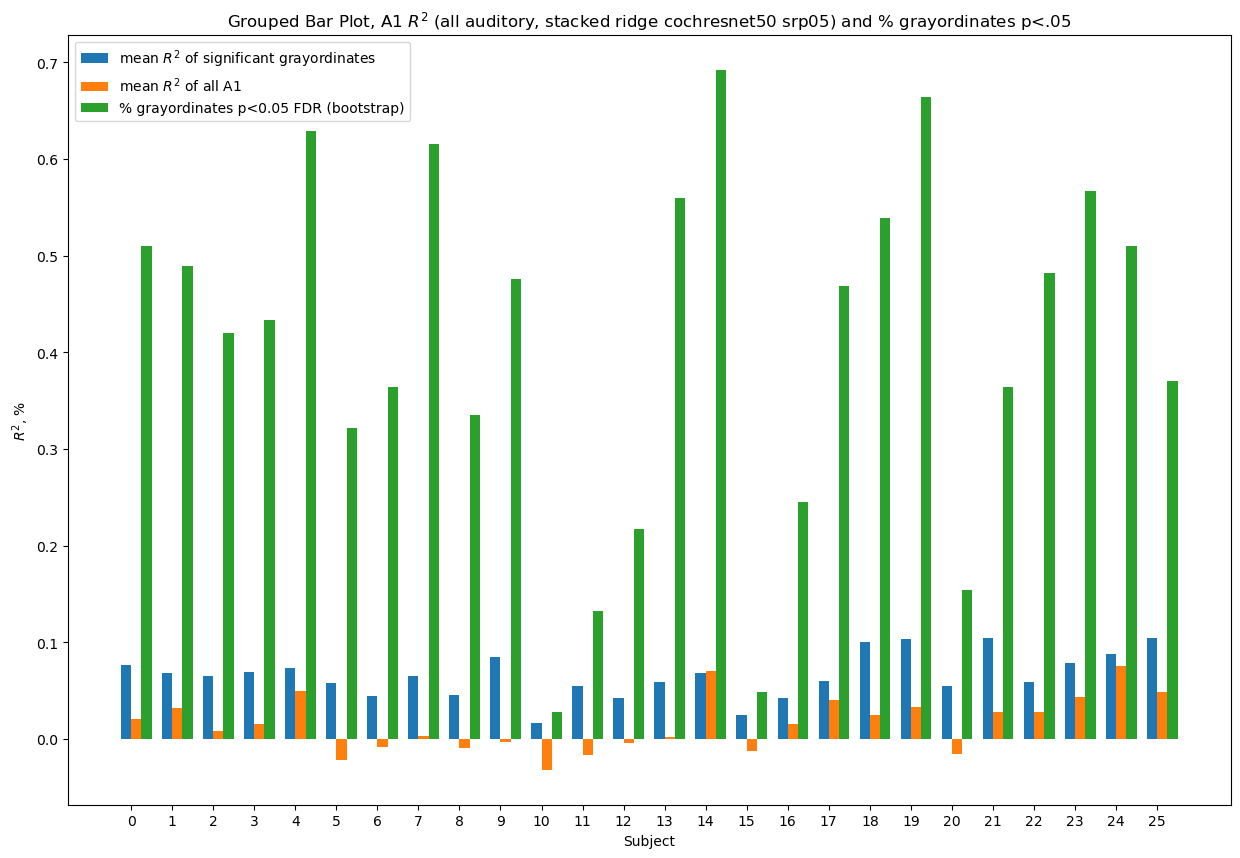

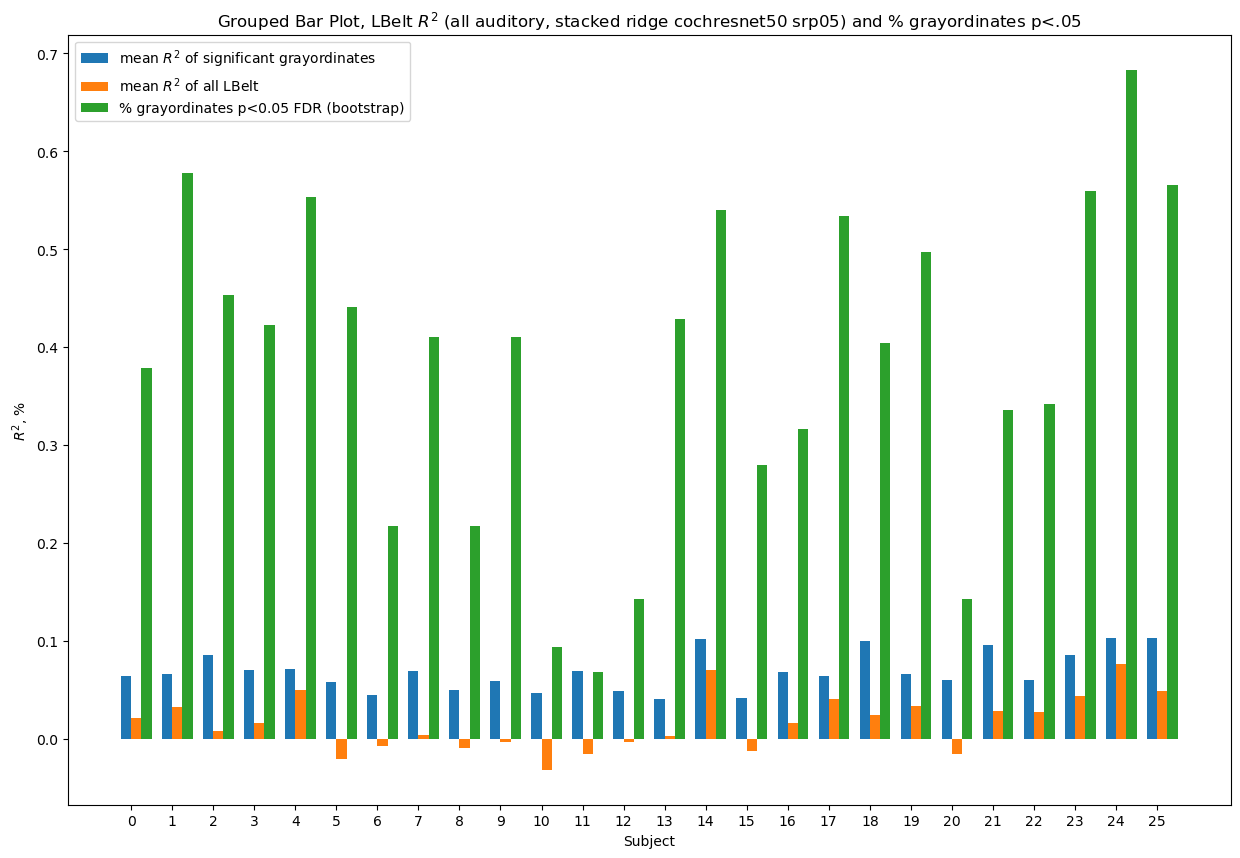

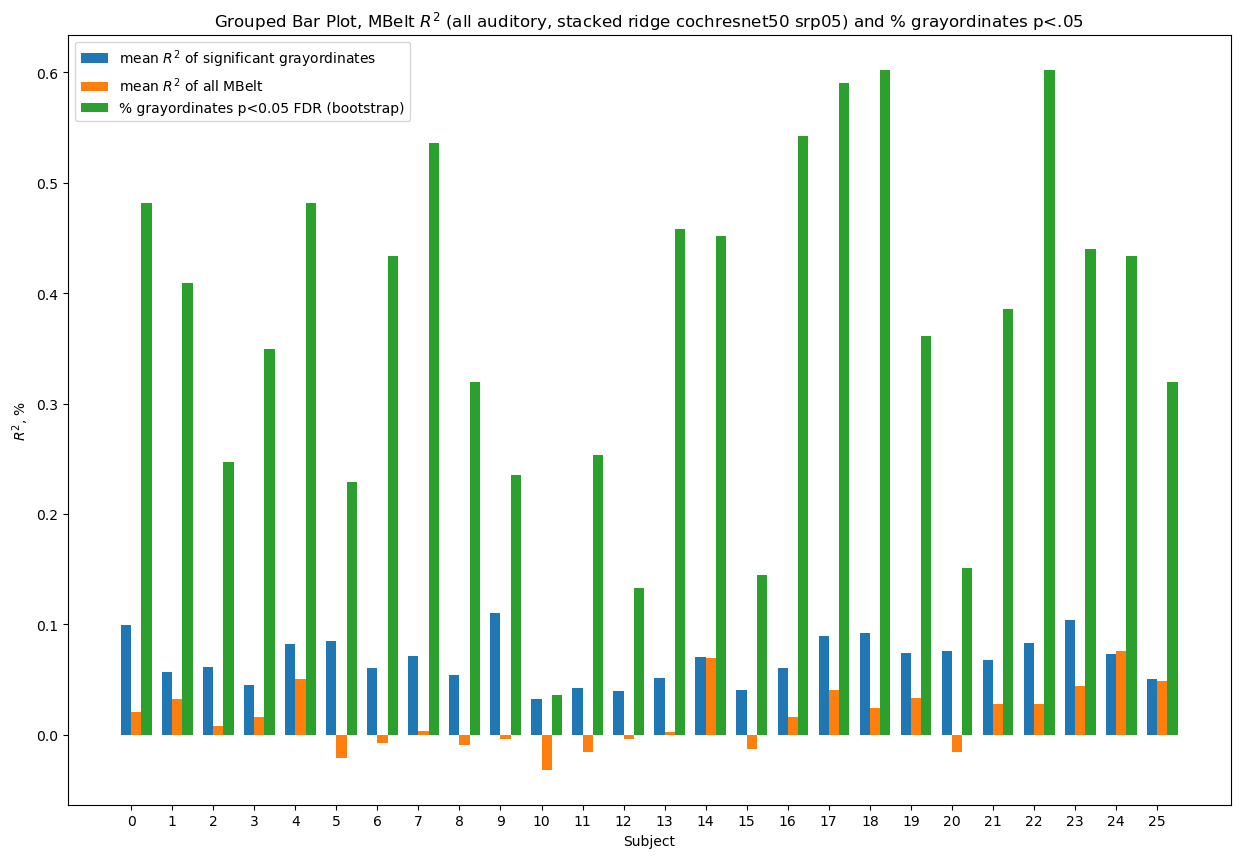

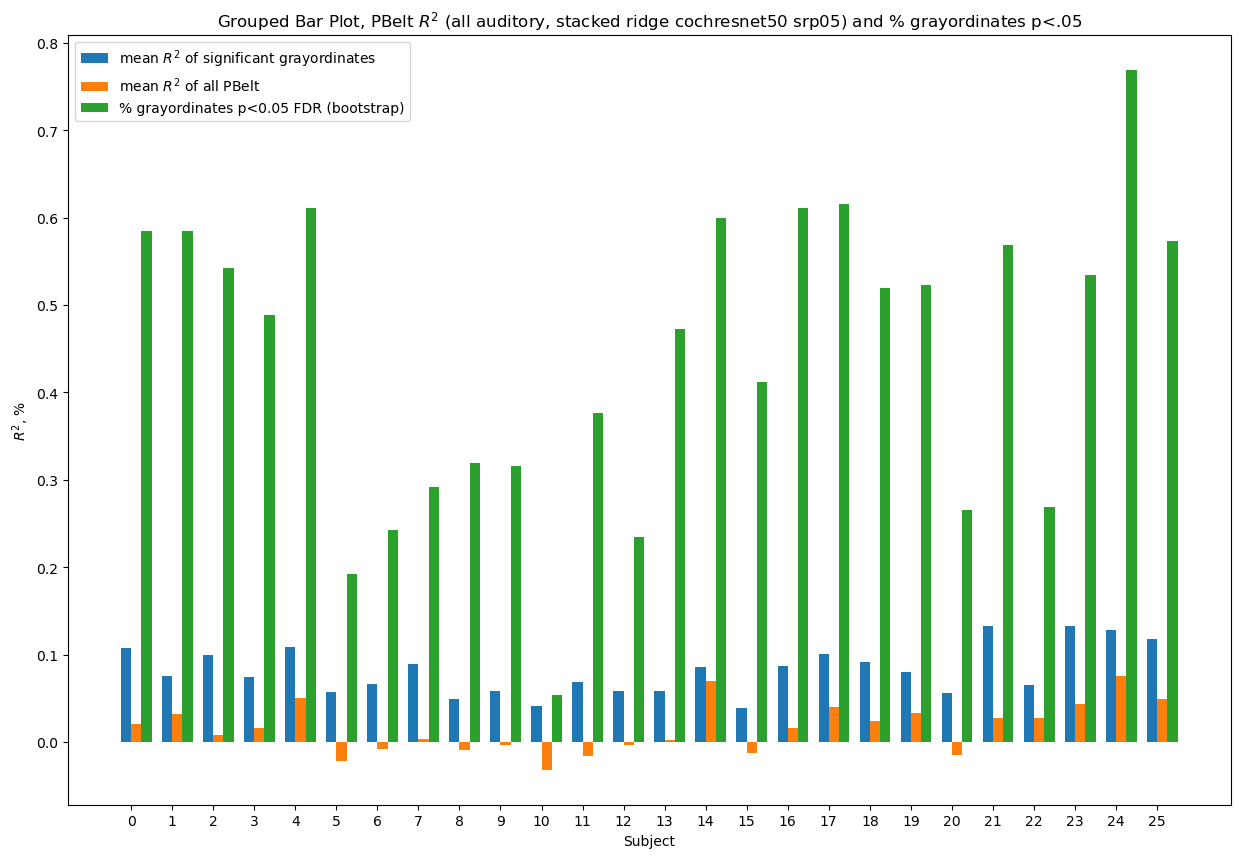

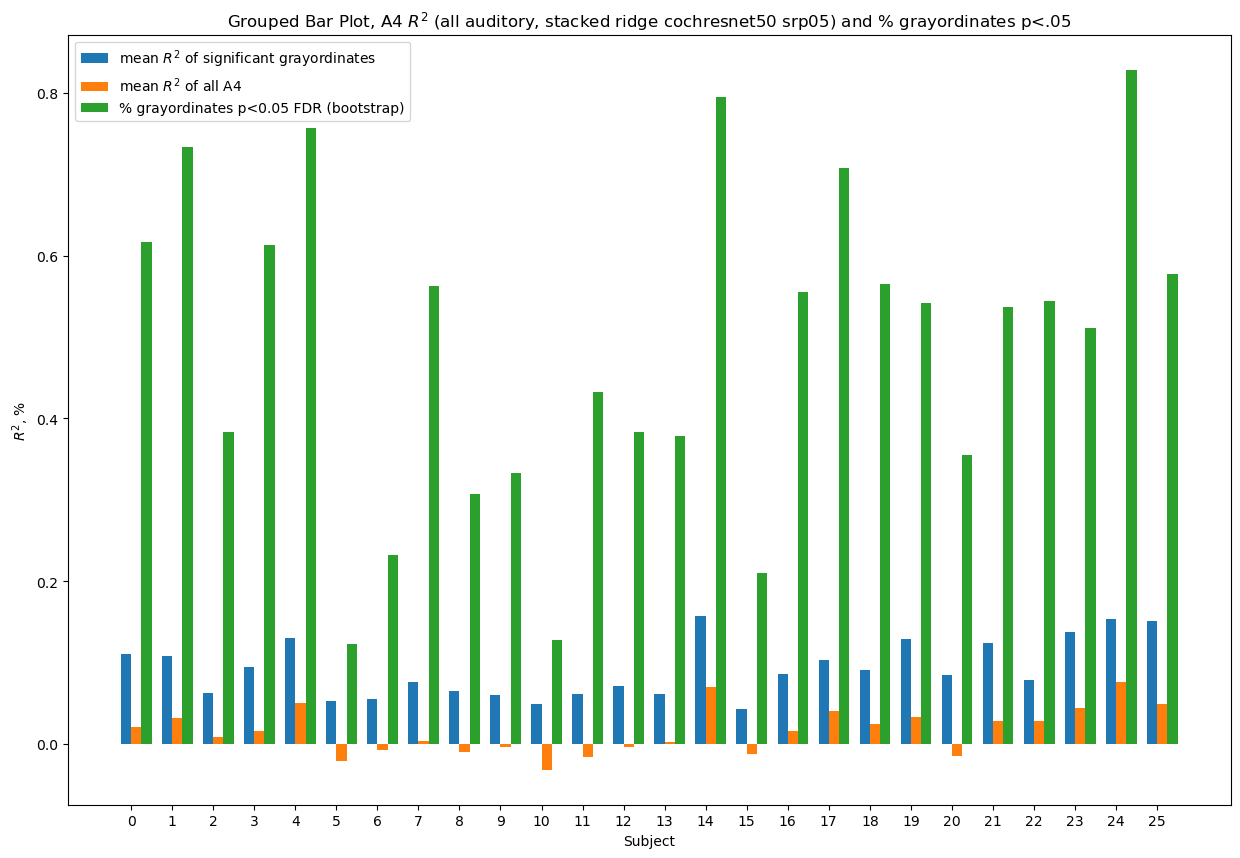

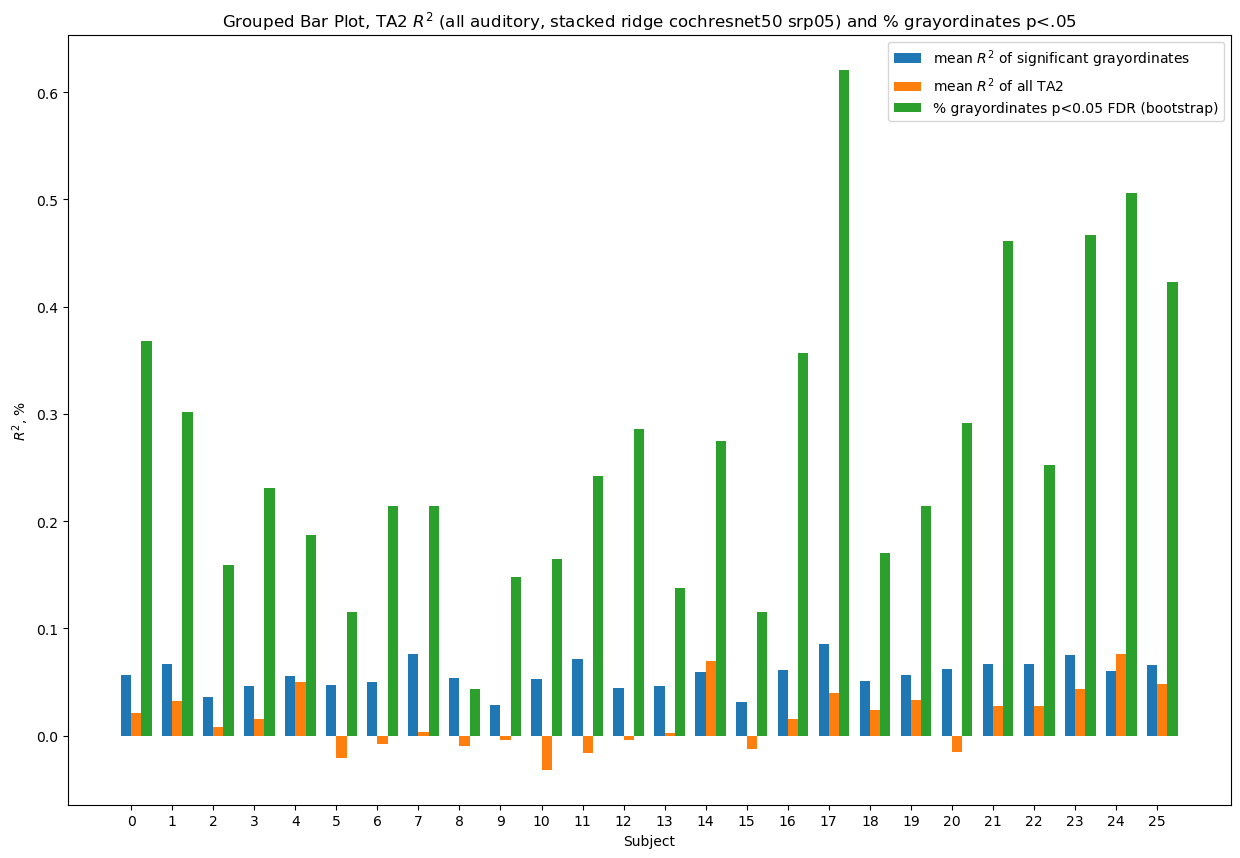

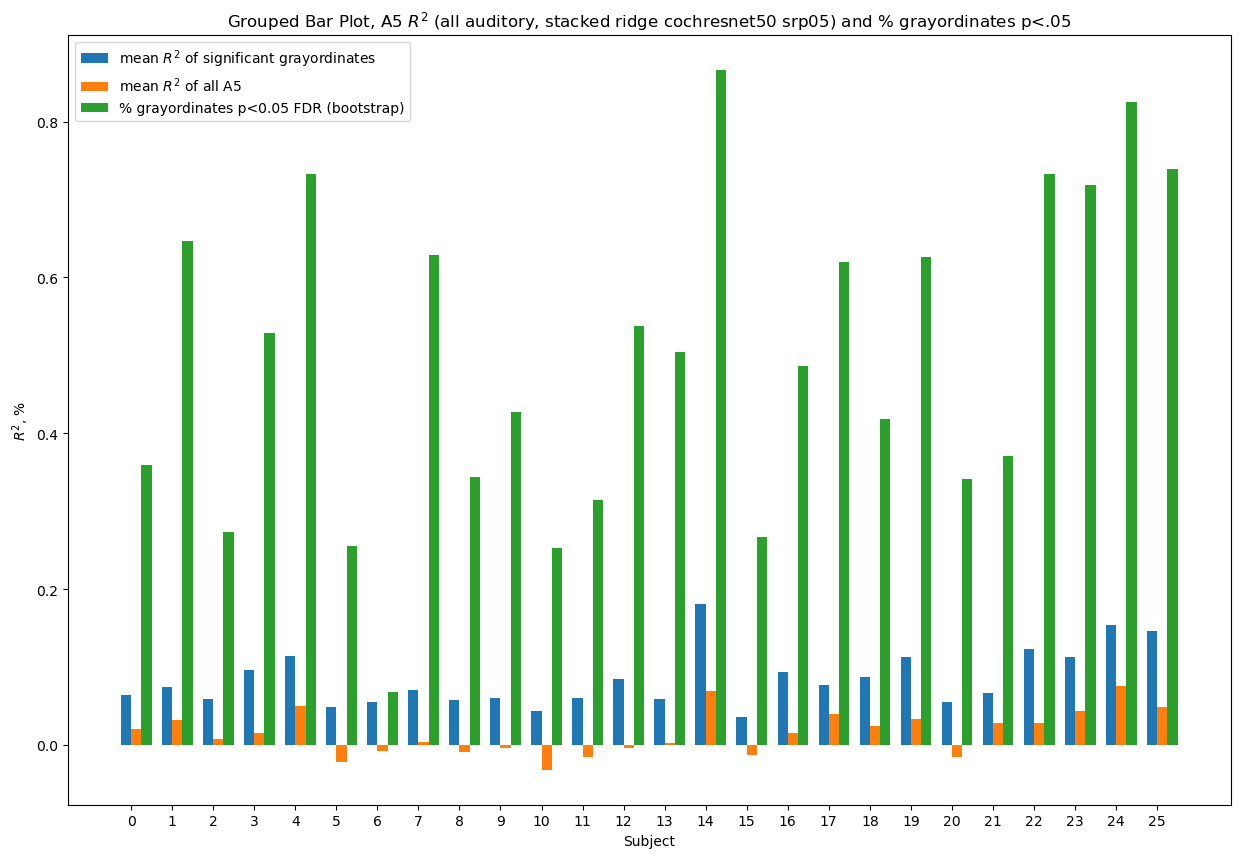

In [45]:
parcel_names_list=[
        'A1',
        'LBelt',
        'MBelt',
        'PBelt',
        'A4',
        'TA2',
        'A5']

for p in parcel_names_list:
    #p='A5'
    #load specific mapping
    parcel_mapping=pilot.extract_parcels([p])
    #pull from brain
    #parcel_data_list.append(np.mean(full_brain[parcel_mapping],axis=0))
    #parcel_r2_list.append(np.mean(full_brain_r2[parcel_mapping],axis=0))
    
    
    percent_sig=[]
    mean_r2=[]
    mean_r2_sig=[]
    for sub in good_subjects_list:
        loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-auditory_feat-cochresnet50srp05hrfssfirst_delay-0.npz')
        #sub_data=loaded['stacked_r2s']
        
        parcels=pilot.select_parcels('auditory') # load parcel set
        atlas_indices_indices=pilot.extract_parcels(parcels) # get indices of parcels
        
        sub_data=loaded['stacked_r2s']
        #map to full brain
        full_brain=np.zeros((91282,))
        full_brain[atlas_indices_indices]=sub_data
    

        #print(full_brain.shape)
        sub_data=full_brain[parcel_mapping]
        #print(sub_data.shape)
    
        mean_r2.append(np.mean(loaded['stacked_r2s']))
        bootstrap_files = glob.glob(f'../good_pilots_new/sub-{sub}_roi-auditory_feat-cochresnet50srp05hrfssfirst_delay-0_bootstrap-*.npz')
        bootstrap_data=[]
        for f in bootstrap_files:
            data=np.load(f)
            bootstrap_data.append(data['stacked_r2s'])
        bootstrap_data=np.asanyarray(bootstrap_data)
        
        p_vals=[]
        for i,sub_d in enumerate(sub_data):
            bool_arr=bootstrap_data[:,i]>sub_d
            count = np.sum(bool_arr)
            p_vals.append(count/bootstrap_data.shape[0])
        
        #bh_corrected=false_discovery_control(p_vals, method='bh')
        #sub_data[bh_corrected > 0.05] = 0
        bh_corrected = fdr_correction(p_vals)
        count_p=len([x for x in p_vals if x <= 0.05])
        count = len([x for x in bh_corrected if x <= 0.05])
        #print(len(bootstrap_files),count_p,count)
        percent_sig.append(count/len(p_vals))
    
        mean_r2_sig.append(np.mean(sub_data[np.where(bh_corrected<= 0.05)]))
    
    N = len(mean_r2_sig)
    # Position of bars on x-axis
    ind = np.arange(N)
    # Width of bars
    width = 0.25
    # Plotting the bars
    fig, ax = plt.subplots(figsize=(15, 10))
    bar1 = ax.bar(ind, mean_r2_sig, width, label='mean $R^2$ of significant grayordinates')
    bar2 = ax.bar(ind + width, mean_r2, width, label=f'mean $R^2$ of all {p}')
    bar3 = ax.bar(ind + 2 * width, percent_sig, width, label='% grayordinates p<0.05 FDR (bootstrap)')
    # Adding labels, title, and legend
    ax.set_xlabel('Subject')
    ax.set_ylabel('$R^2$, %')
    ax.set_title(f'Grouped Bar Plot, {p} $R^2$ (all auditory, stacked ridge cochresnet50 srp05) and % grayordinates p<.05')
    ax.set_xticks(ind + width / 2)
    #ax.set_xticklabels([chr(i) for i in range(65, 65 + N)])  # Labels as A, B, C, ..., Z
    ax.set_xticklabels([i for i in range(N)])  # Labels as A, B, C, ..., Z
    ax.legend()
    plt.show()

0.1464473077473968

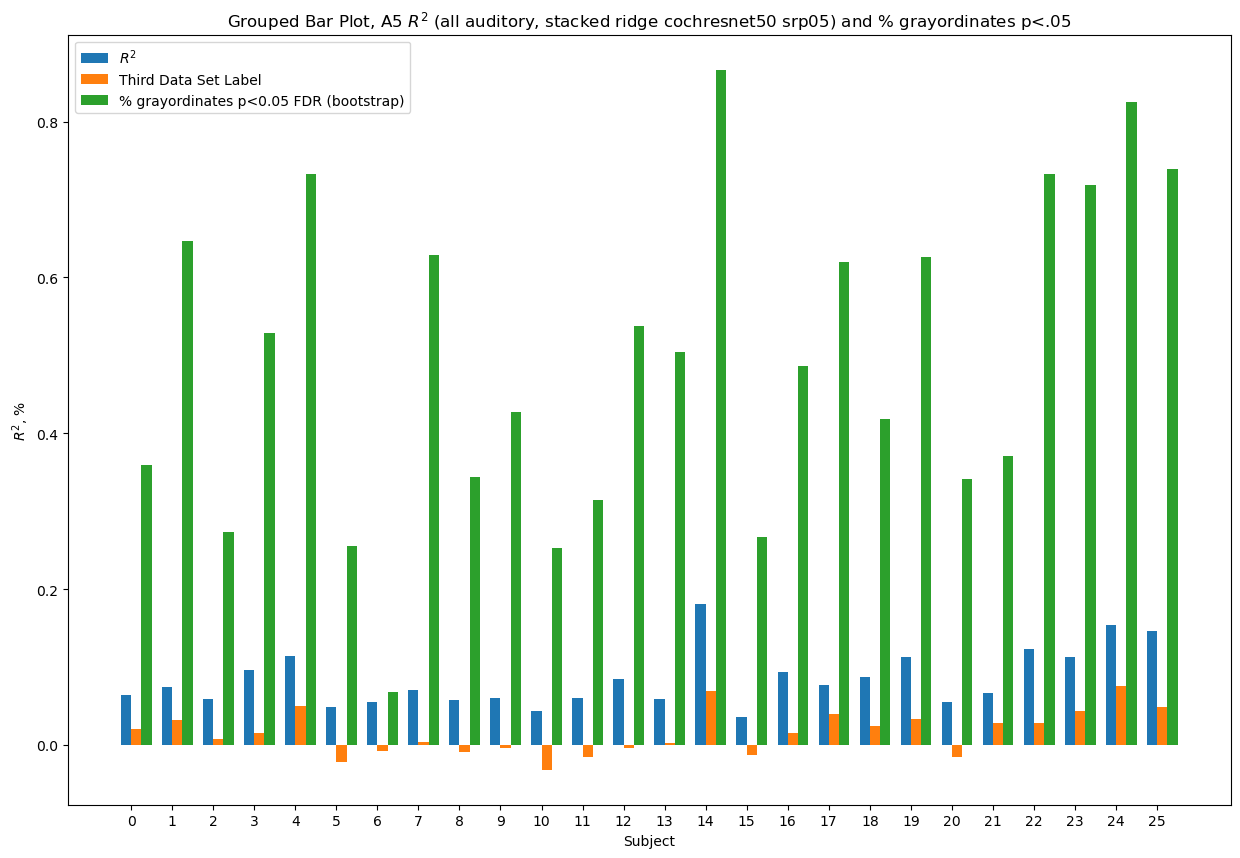